In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the training set
dataset_train = pd.read_csv('./google_stock_price_train.csv')
train_set = dataset_train.iloc[:, 1:2].values

In [2]:
# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = sc.fit_transform(train_set)

# Createing a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2515):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [3]:
# Initializing the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True,
                   input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

In [4]:
# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
77/77 [==============================] - 10s 70ms/step - loss: 0.0506
Epoch 2/100
77/77 [==============================] - 6s 80ms/step - loss: 0.0040
Epoch 3/100
77/77 [==============================] - 6s 81ms/step - loss: 0.0030
Epoch 4/100
77/77 [==============================] - 7s 94ms/step - loss: 0.0026
Epoch 5/100
77/77 [==============================] - 8s 110ms/step - loss: 0.0028
Epoch 6/100
77/77 [==============================] - 10s 133ms/step - loss: 0.0030
Epoch 7/100
77/77 [==============================] - 11s 145ms/step - loss: 0.0021
Epoch 8/100
77/77 [==============================] - 12s 151ms/step - loss: 0.0023
Epoch 9/100
77/77 [==============================] - 10s 126ms/step - loss: 0.0018
Epoch 10/100
77/77 [==============================] - 9s 119ms/step - loss: 0.0025
Epoch 11/100
77/77 [==============================] - 9s 122ms/step - loss: 0.0020
Epoch 12/100
77/77 [==============================] - 9s 120ms/step - loss: 0.0023
Epoch 13/100

Epoch 99/100
77/77 [==============================] - 8s 105ms/step - loss: 8.9992e-04
Epoch 100/100
77/77 [==============================] - 7s 90ms/step - loss: 8.7565e-04


In [10]:
# Load the real stock price of 2020
dataset_test = pd.read_csv('./google_stock_price_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2020
dataset_total = pd.concat(
    (dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 310):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
regressor.save('Google_Stock_Price_RNN_Model.h5')

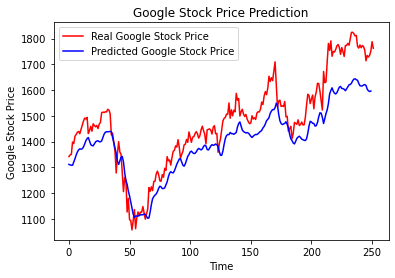

In [11]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',
         label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()